In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math


In [2]:
pip install numpy==1.19.5


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.5.0


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorboard-2.16.1-py3-none-any.whl (5.5 MB)
  Using cached tensorboard-2.16.0-py3-none-any.whl (5.5 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached tensorboard-2.15.1-py3-none-any.whl

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.16.1 requires flatbuffers>=23.5.26, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.16.1 requires h5py>=3.10.0, but you have h5py 3.1.0 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.16.1 requires tensorboard<

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
pip install --upgrade pandas-datareader


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
start = '2010-01-01'
end =date.today()

In [17]:
import yfinance as yf

In [29]:
ticker_symbol = '^NSEBANK'
data = yf.download(ticker_symbol, start, end)

[*********************100%%**********************]  1 of 1 completed


In [30]:

data.rename(columns={'Adj Close':'Price'},inplace=True)


In [37]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Price', 'Volume'], dtype='object')

In [38]:
del data['Open']

In [39]:
del data['High']
del data['Low']
del data['Close']
del data['Volume']

In [40]:
data.columns

Index(['Price'], dtype='object')

In [41]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 3237 number of days in the dataset.


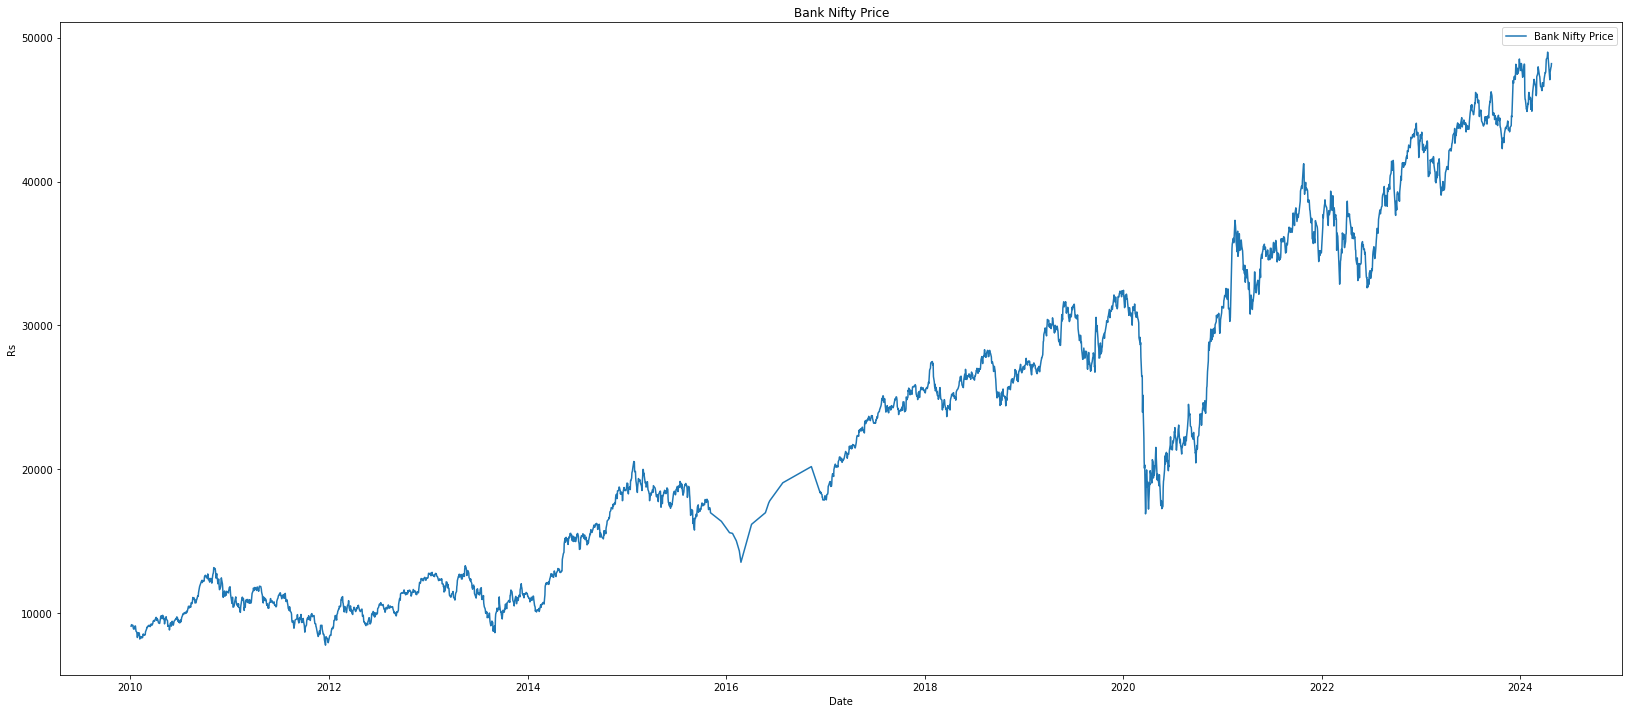

In [42]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [43]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [44]:
df = get_technical_indicators(data)

In [45]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2010-02-02,8468.051758,8570.164621,8907.251209,8801.125640,8697.562624,-103.563016,277.084304,9461.419817,8353.082601,8520.789995,8467.051758,9.043938
2010-02-03,8631.749023,8550.050363,8884.370489,8785.751251,8687.174164,-98.577088,279.141497,9442.653484,8326.087495,8594.762681,8630.749023,9.063087
2010-02-04,8471.000977,8517.836496,8850.035110,8757.650414,8653.187900,-104.462514,283.712321,9417.459752,8282.610467,8512.254878,8470.000977,9.044286
2010-02-05,8223.154297,8502.615234,8802.428525,8710.645459,8585.806167,-124.839292,301.348333,9405.125192,8199.731858,8319.521157,8222.154297,9.014588
2010-02-08,8342.103516,8490.951172,8761.917085,8678.678274,8547.728795,-130.949479,303.416110,9368.749305,8155.084865,8334.576063,8341.103516,9.028951


In [73]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for bank nifty - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

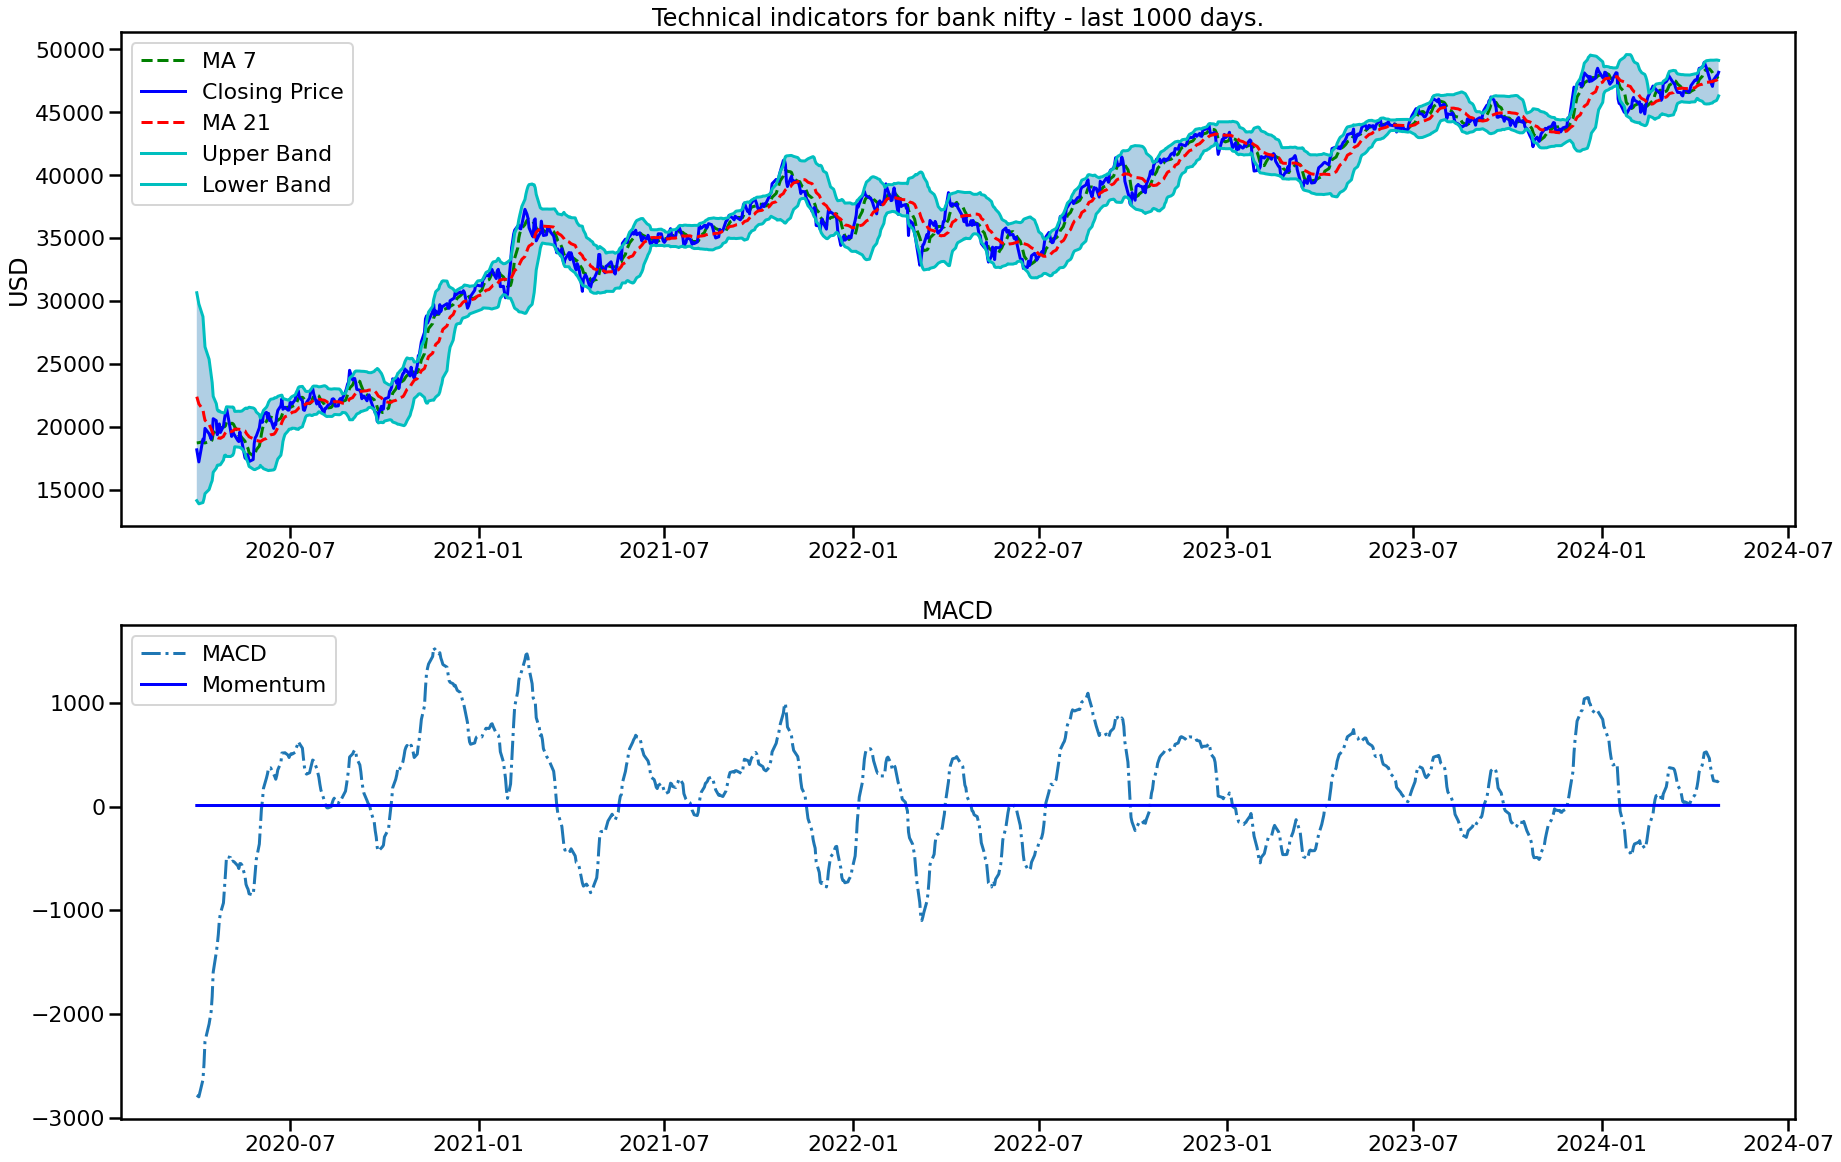

In [74]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

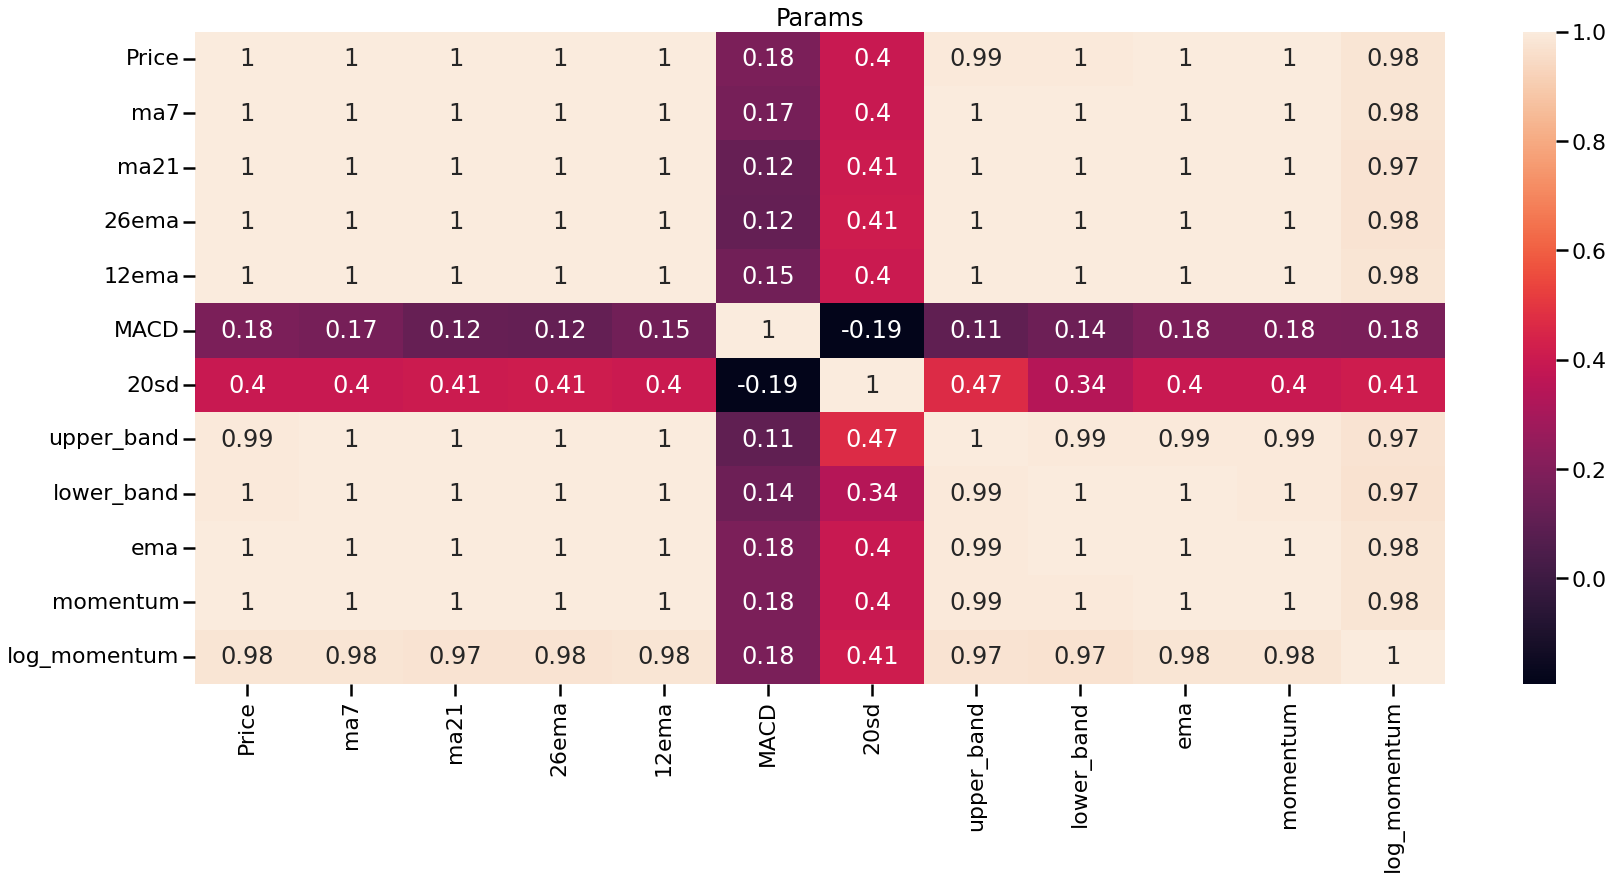

In [48]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [49]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3217 samples, and 12 features.


In [50]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [51]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2010-02-02,8468.051758,8570.164621,8907.251209,8801.125640,8697.562624,-103.563016,277.084304,9461.419817,8353.082601,8520.789995,8467.051758,9.043938
2010-02-03,8631.749023,8550.050363,8884.370489,8785.751251,8687.174164,-98.577088,279.141497,9442.653484,8326.087495,8594.762681,8630.749023,9.063087
2010-02-04,8471.000977,8517.836496,8850.035110,8757.650414,8653.187900,-104.462514,283.712321,9417.459752,8282.610467,8512.254878,8470.000977,9.044286
2010-02-05,8223.154297,8502.615234,8802.428525,8710.645459,8585.806167,-124.839292,301.348333,9405.125192,8199.731858,8319.521157,8222.154297,9.014588
2010-02-08,8342.103516,8490.951172,8761.917085,8678.678274,8547.728795,-130.949479,303.416110,9368.749305,8155.084865,8334.576063,8341.103516,9.028951
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,47069.449219,48170.128906,47448.466704,47517.290619,47806.004689,288.714071,849.065441,49146.597585,45750.335822,47273.078862,47068.449219,10.759358
2024-04-19,47574.148438,48026.193080,47495.135603,47521.502309,47770.334497,248.832188,826.388554,49147.912711,45842.358494,47473.791912,47573.148438,10.770024
2024-04-22,47924.898438,47911.099888,47559.373698,47551.383504,47794.113565,242.730061,803.473795,49166.321288,45952.426108,47774.529596,47923.898438,10.777370


In [52]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2010-02-02,8468.051758,8570.164621,8907.251209,8801.125640,8697.562624,-103.563016,277.084304,9461.419817,8353.082601,8520.789995,8467.051758,9.043938
2010-02-03,8631.749023,8550.050363,8884.370489,8785.751251,8687.174164,-98.577088,279.141497,9442.653484,8326.087495,8594.762681,8630.749023,9.063087
2010-02-04,8471.000977,8517.836496,8850.035110,8757.650414,8653.187900,-104.462514,283.712321,9417.459752,8282.610467,8512.254878,8470.000977,9.044286
2010-02-05,8223.154297,8502.615234,8802.428525,8710.645459,8585.806167,-124.839292,301.348333,9405.125192,8199.731858,8319.521157,8222.154297,9.014588
2010-02-08,8342.103516,8490.951172,8761.917085,8678.678274,8547.728795,-130.949479,303.416110,9368.749305,8155.084865,8334.576063,8341.103516,9.028951
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24,27266.083984,27428.559431,27316.272972,27208.597766,27369.272579,160.674812,220.655927,27757.584826,26874.961119,27287.727213,27265.083984,10.213362
2019-01-25,27114.986328,27375.931920,27322.392020,27201.663586,27330.151617,128.488031,212.691272,27747.774564,26897.009476,27172.566623,27113.986328,10.207805
2019-01-28,26652.740234,27250.833426,27311.654018,27161.002597,27225.934481,64.931885,240.155274,27791.964567,26831.343469,26826.015697,26651.740234,10.190610


In [53]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2019-01-31,27295.132812,26996.808036,27275.187872,27110.569379,27112.501377,1.931998,302.590552,27880.368977,26670.006767,27119.841293,27294.132812,10.214427
2019-02-01,27085.634766,26973.265346,27281.192522,27108.722371,27108.368052,-0.354318,297.216979,27875.626480,26686.758564,27097.036941,27084.634766,10.206722
2019-02-04,27186.283203,26961.865234,27280.792504,27114.467617,27120.354998,5.887381,297.344857,27875.482217,26686.102790,27156.534449,27185.283203,10.210431
2019-02-05,27271.382812,26984.207589,27279.228144,27126.090965,27143.590047,17.499082,297.301775,27873.831693,26684.624594,27233.100025,27270.382812,10.213557
2019-02-06,27402.031250,27091.249163,27274.125837,27146.530986,27183.350232,36.819246,294.059781,27862.245398,26686.006276,27345.720842,27401.031250,10.218336
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,47069.449219,48170.128906,47448.466704,47517.290619,47806.004689,288.714071,849.065441,49146.597585,45750.335822,47273.078862,47068.449219,10.759358
2024-04-19,47574.148438,48026.193080,47495.135603,47521.502309,47770.334497,248.832188,826.388554,49147.912711,45842.358494,47473.791912,47573.148438,10.770024
2024-04-22,47924.898438,47911.099888,47559.373698,47551.383504,47794.113565,242.730061,803.473795,49166.321288,45952.426108,47774.529596,47923.898438,10.777370


In [54]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(1935, 12)


array([[0.0326293 , 0.02151149, 0.02926576, ..., 0.03154458, 0.0326293 ,
        0.06387762],
       [0.04060628, 0.02050703, 0.02810333, ..., 0.03517798, 0.04060628,
        0.07872493],
       [0.03277302, 0.01889834, 0.02635896, ..., 0.03112535, 0.03277302,
        0.06414764],
       ...,
       [0.9187704 , 0.95438137, 0.96428198, ..., 0.93066478, 0.9187704 ,
        0.95296135],
       [0.91488913, 0.94808002, 0.96294694, ..., 0.92238267, 0.91488913,
        0.95064072],
       [0.92717377, 0.94302852, 0.96213723, ..., 0.92787696, 0.92717377,
        0.95796207]])

In [55]:
X_train = []
y_train = []

In [56]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [57]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((1875, 60, 12), (1875,))

In [58]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [59]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            12600     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [60]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [72]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
30/30 [==============================] - 6s 213ms/step - loss: 0.0036
Epoch 2/50
30/30 [==============================] - 6s 192ms/step - loss: 0.0033
Epoch 3/50
30/30 [==============================] - 6s 216ms/step - loss: 0.0029
Epoch 4/50
30/30 [==============================] - 7s 237ms/step - loss: 0.0036
Epoch 5/50
30/30 [==============================] - 6s 185ms/step - loss: 0.0034
Epoch 6/50
30/30 [==============================] - 6s 204ms/step - loss: 0.0034
Epoch 7/50
30/30 [==============================] - 7s 231ms/step - loss: 0.0030
Epoch 8/50
30/30 [==============================] - 6s 191ms/step - loss: 0.0031
Epoch 9/50
30/30 [==============================] - 6s 185ms/step - loss: 0.0033
Epoch 10/50
30/30 [==============================] - 6s 197ms/step - loss: 0.0032
Epoch 11/50
30/30 [==============================] - 5s 178ms/step - loss: 0.0032
Epoch 12/50
30/30 [==============================] - 5s 178ms/step - loss: 0.0031
Epoch 13/50
30/30 [======

In [62]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

C:\Users\Asus\AppData\Local\Temp\ipykernel_5732\175218773.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = past_60.append(data_testing, ignore_index = True)


,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,25701.351562,25026.065848,25021.713728,25326.704352,25142.846290,-183.858062,359.701904,25741.117535,24302.309920,25543.932095,25700.351562,10.154260
1,25731.900391,25156.743025,25065.184617,25356.718874,25233.469998,-123.248875,388.027196,25841.239009,24289.130224,25669.244292,25730.900391,10.155448
2,25597.703125,25324.876674,25120.162574,25374.569559,25289.505864,-85.063695,377.127089,25874.416753,24365.908396,25621.550181,25596.703125,10.150219
3,25737.201172,25435.989955,25173.454892,25401.431160,25358.382065,-43.049095,381.673125,25936.801142,24410.108643,25698.650841,25736.201172,10.155654
4,25770.701172,25573.595703,25232.661365,25428.784494,25421.815774,-6.968720,372.769716,25978.200797,24487.121934,25746.684395,25769.701172,10.156955
...,...,...,...,...,...,...,...,...,...,...,...,...
1337,47069.449219,48170.128906,47448.466704,47517.290619,47806.004689,288.714071,849.065441,49146.597585,45750.335822,47273.078862,47068.449219,10.759358
1338,47574.148438,48026.193080,47495.135603,47521.502309,47770.334497,248.832188,826.388554,49147.912711,45842.358494,47473.791912,47573.148438,10.770024
1339,47924.898438,47911.099888,47559.373698,47551.383504,47794.113565,242.730061,803.473795,49166.321288,45952.426108,47774.529596,47923.898438,10.777370
1340,47970.449219,47765.935268,47634.880766,47582.425409,47821.242127,238.816718,760.954554,49156.789875,46112.971658,47905.142678,47969.449219,10.778320


In [63]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(1342, 12)


array([[0.27390495, 0.23762364, 0.2127504 , ..., 0.25809503, 0.27390495,
        0.39334307],
       [0.27485754, 0.24187573, 0.21424976, ..., 0.26207998, 0.27485754,
        0.39446036],
       [0.27067292, 0.2473466 , 0.21614602, ..., 0.2605633 , 0.27067292,
        0.38954231],
       ...,
       [0.96689332, 0.98227653, 0.99010069, ..., 0.96503296, 0.96689332,
        0.97939119],
       [0.96831371, 0.97755304, 0.99270502, ..., 0.96918648, 0.96831371,
        0.98028471],
       [0.9751287 , 0.97580732, 0.99578968, ..., 0.9752043 , 0.9751287 ,
        0.98456004]])

In [64]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1282, 60, 12), (1282,))

In [65]:
y_pred = regressor.predict(X_test)

In [66]:
y_pred

array([[0.31403518],
       [0.31411147],
       [0.31405717],
       ...,
       [0.8722571 ],
       [0.8730715 ],
       [0.8736778 ]], dtype=float32)

In [67]:
scale = 1/scalar.scale_[0]

In [68]:
y_pred = y_pred*scale
y_test = y_test*scale

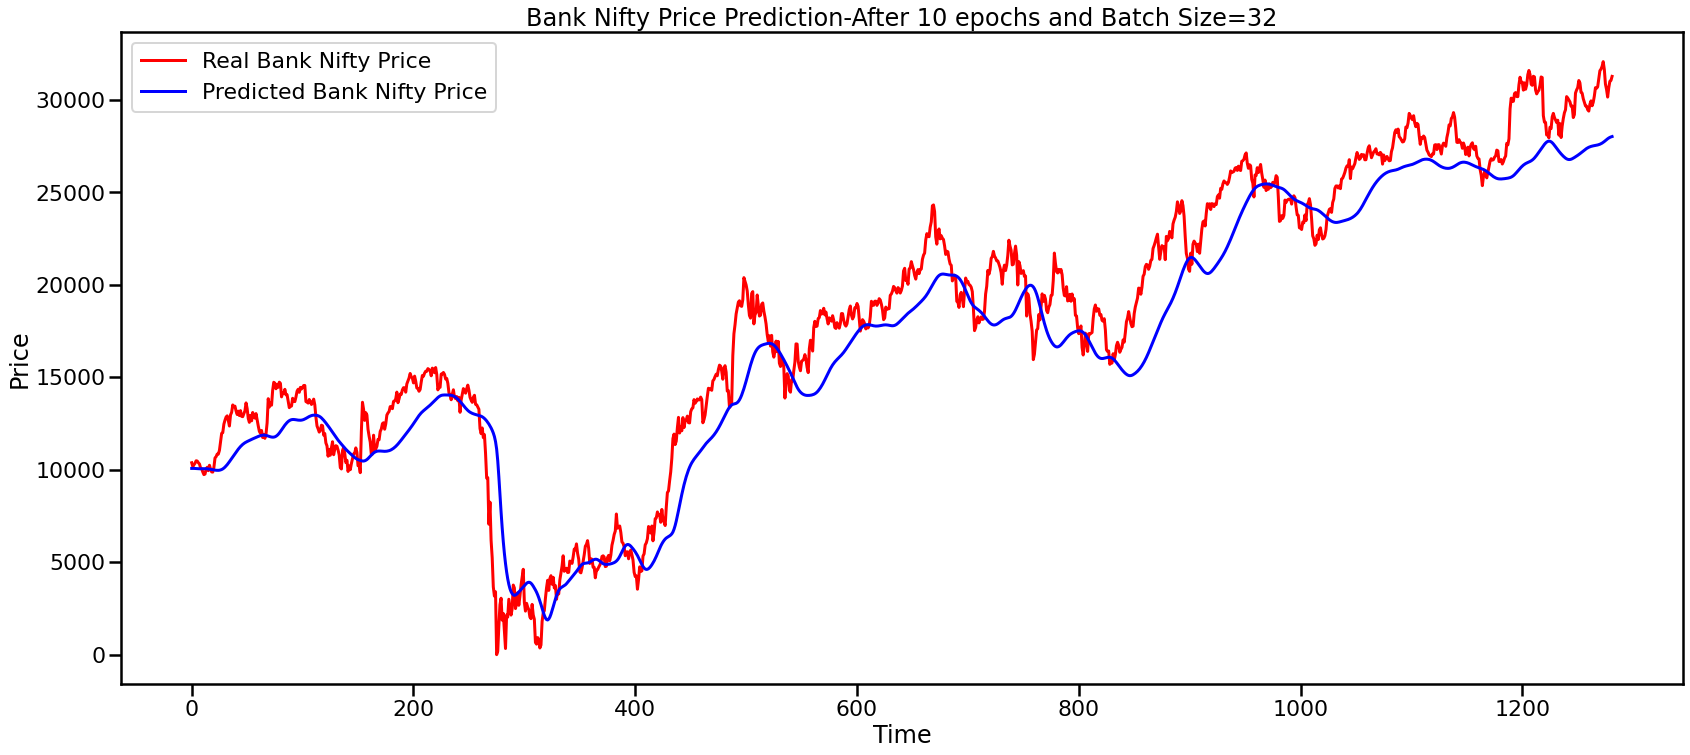

In [69]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

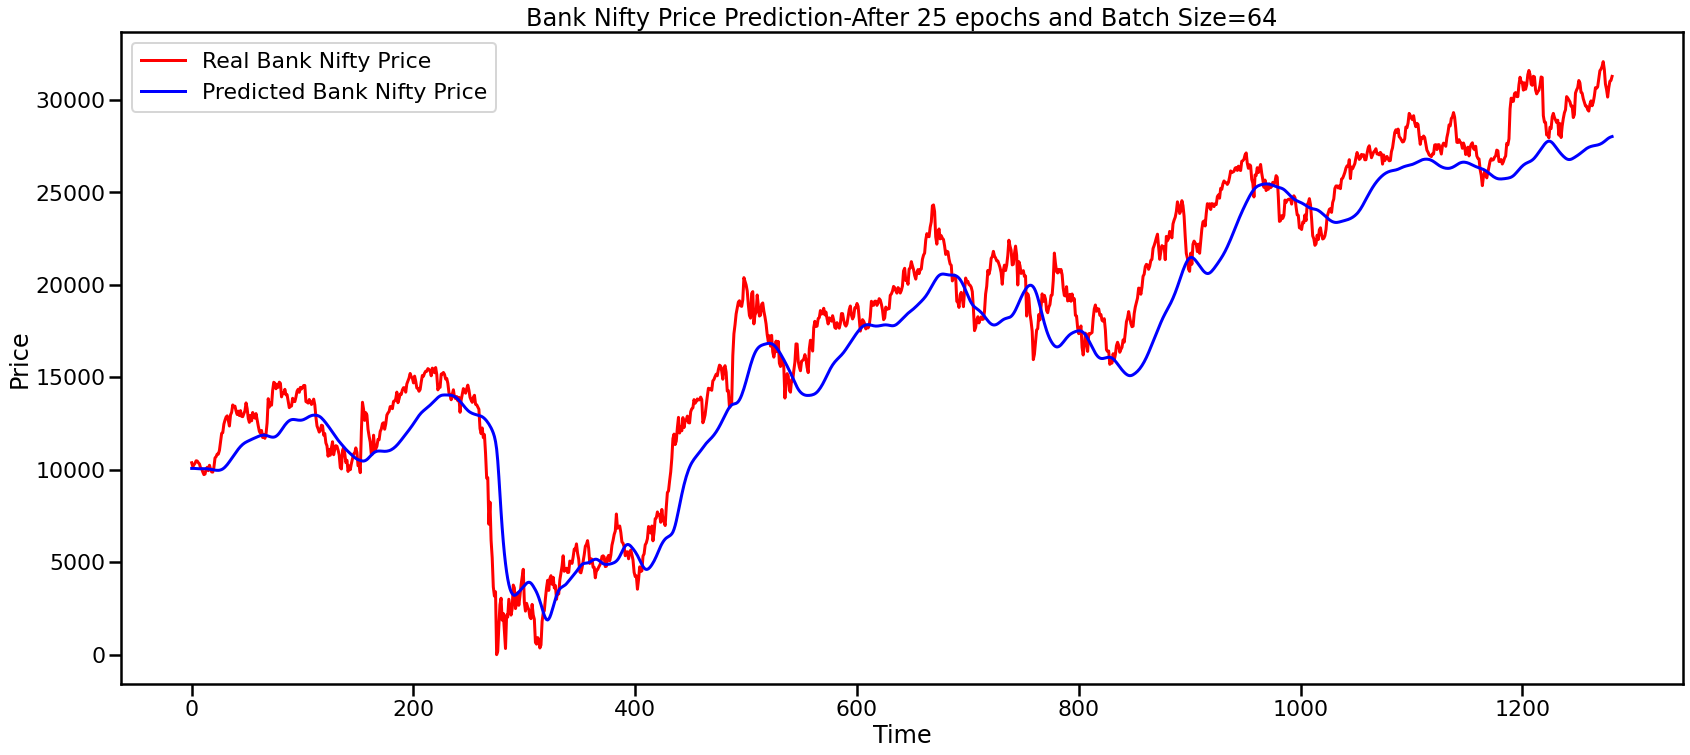

In [70]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

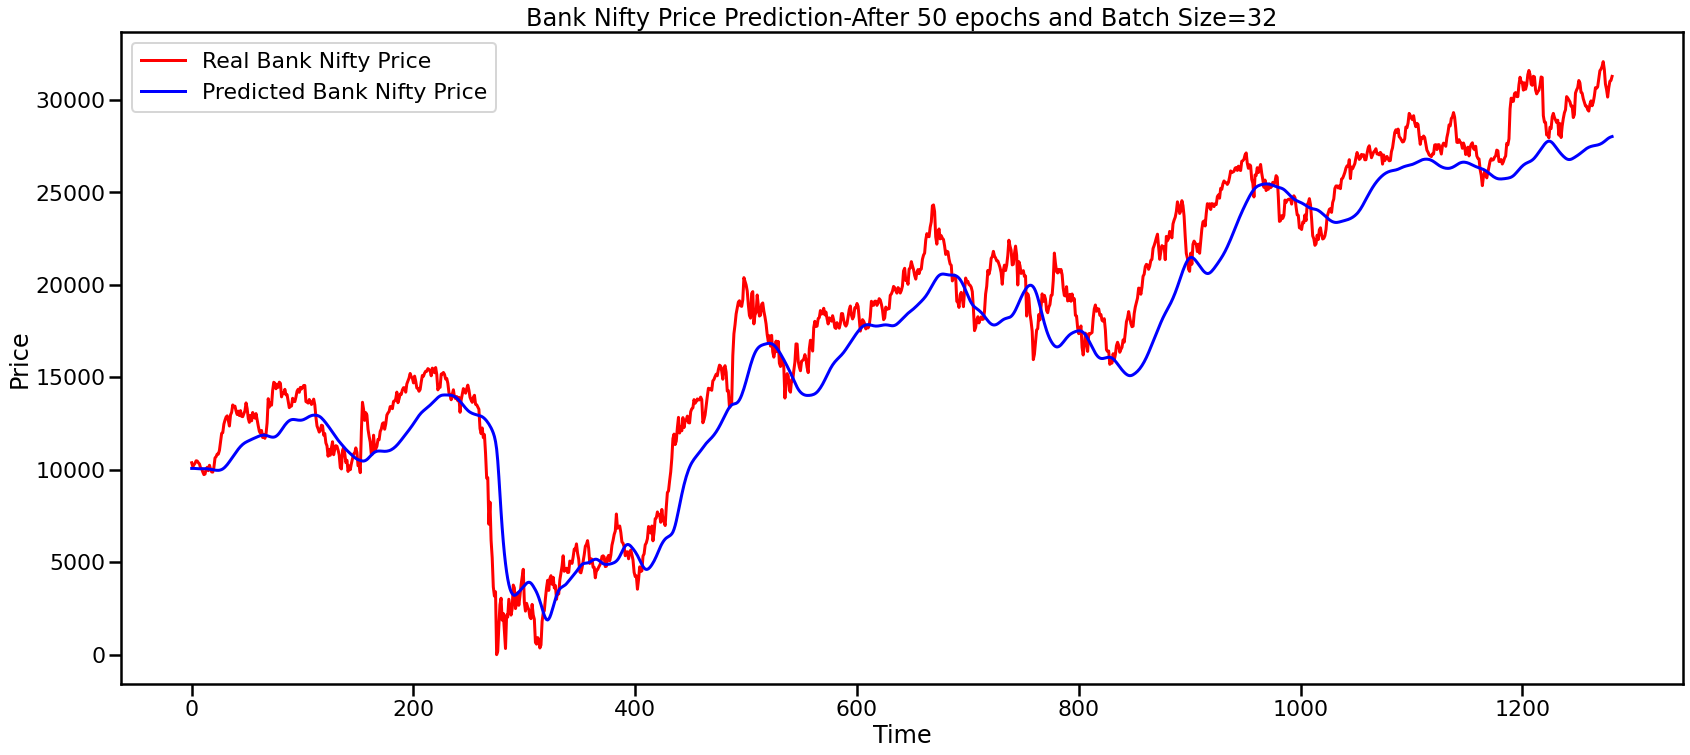

In [71]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [75]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [76]:
import pickle

In [78]:
filename = 'model.sav'
pickle.dump(y_pred,open(filename, 'wb'))